# ML Medical Records

## Part 1: Load From SQL

In [21]:
from getpass import getpass
import kardiasclean
import pandas as pd

# Connect to database with password
password = getpass('Enter database password')
host = "kardias-test.cvj7xeynbmtt.us-east-1.rds.amazonaws.com"
pgm = kardiasclean.PostgresManager("kardias", password, host)

In [22]:
# Query
a = "diagnosis_main_map"
b = "diagnosis_main"
df = pgm.read_query(f"""
        SELECT * FROM
        patients as pat
        JOIN {a} as a
        ON a.patient_id = pat.patient_id
        JOIN {b} as b
        ON b.token = a.token;
    """
)
print(df.columns.values)
df = df.T.groupby(level=0).first().T
df

['patient_id' 'gender' 'state' 'municipality' 'altitude' 'age' 'weight_kg'
 'height_cm' 'appearance' 'cx_previous' 'date_birth' 'date_procedure'
 'rachs' 'stay_days' 'expired' 'patient_id' 'token' 'token'
 'diagnosis_main' 'keywords']


,age,altitude,appearance,cx_previous,date_birth,date_procedure,diagnosis_main,expired,gender,height_cm,keywords,municipality,patient_id,rachs,state,stay_days,token,weight_kg
0,3942,2726,Normal,0,2001-08-22,2012-04-08,Comunicacion interauricular secundum,0,0,134.0,Comunicacion interauricular secundum,Huixquilucan,0,1.0,Estado de México,2.0,KMNKSNNTRRKLRSKNTM,35.0
1,3202,2741,Desnutrido,0,2003-09-19,2012-11-08,Comunicacion interauricular secundum,0,1,117.0,Comunicacion interauricular secundum,Timilpan,1,1.0,Estado de México,2.0,KMNKSNNTRRKLRSKNTM,18.0
2,3147,2240,Normal,0,2003-11-21,2012-08-18,Comunicacion interauricular secundum,0,0,120.0,Comunicacion interauricular secundum,Coyoacán,2,1.0,Ciudad de México,2.0,KMNKSNNTRRKLRSKNTM,22.0
3,4005,2220,Normal,0,2001-10-07,2012-08-25,Comunicacion interauricular secundum,0,0,147.0,Comunicacion interauricular secundum,Nezahualcoyotl,3,1.0,Estado de México,2.0,KMNKSNNTRRKLRSKNTM,42.0
4,5289,2373,Normal,0,1997-12-22,2012-01-09,Comunicacion interauricular secundum,0,0,157.0,Comunicacion interauricular secundum,Alvaro Obregón,4,1.0,Ciudad de México,3.0,KMNKSNNTRRKLRSKNTM,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,14,1980,Normal,0,2022-10-10,2022-10-24,conducto arterioso permeable,0,1,50.0,arterioso conducto permeable,Atotonilco el Grande,1035,4.0,Hidalgo,-44214.0,ARTRSKNTKTPRMPL,3.23
1995,67,2100,Desnutrido,0,2022-08-24,2022-10-31,Tetralogia de Fallot TOF -Sindrome de valvula ...,0,1,53.5,-Sindrome Fallot TOF Tetralogia ausente pulmon...,Iztapalapa,1037,3.0,Ciudad de México,-44220.0,SNTRMFLTTFTTRLJSNTPLMNRFLFL,3.8
1996,67,2100,Desnutrido,0,2022-08-24,2022-10-31,Estenosis de la arteria pulmonar,0,1,53.5,Estenosis arteria pulmonar,Iztapalapa,1037,3.0,Ciudad de México,-44220.0,ASTNSSRTRPLMNR,3.8
1997,67,2100,Desnutrido,0,2022-08-24,2022-10-31,Comunicacion interventricular,0,1,53.5,Comunicacion interventricular,Iztapalapa,1037,3.0,Ciudad de México,-44220.0,KMNKSNNTRFNTRKLR,3.8


In [24]:
# Get dataframe from sql
columns = [
    "patient_id",
    "diagnosis_main",
    "gender", 
    "age", 
    "weight_kg", 
    "height_cm", 
    "stay_days"
]
df = df[columns]
df.count()

patient_id        1999
diagnosis_main    1999
gender            1999
age               1999
weight_kg         1999
height_cm         1999
stay_days         1999
dtype: int64

In [25]:
dft = pgm.read_table("diagnosis_main")
dft

,token,diagnosis_main,keywords
0,KMNKSNNTRRKLRSKNTM,Comunicacion interauricular secundum,Comunicacion interauricular secundum
1,KMNKSNTPNTRFNTRKLRPRMMPRNS,Comunicacion interventricular Tipo 2 perimembr...,2 Comunicacion Tipo interventricular perimembr...
2,ASTNSSRTKSPFLFLR,Estenosis aortica subvalvular,Estenosis aortica subvalvular
3,KMNKSNTPNFNTPLRNTRFNTRKLR,Comunicacion interventricular Tipo 1 infundibular,1 Comunicacion Tipo infundibular interventricular
4,KMNKSNSKNTMNTRRKLR,Comunicacion interauricular Secundum,Comunicacion Secundum interauricular
...,...,...,...
862,ASTNSSRTKSPFLFLRFLFLR,Estenosis subvalvular y valvular aortica,Estenosis aortica subvalvular valvular
863,HPPLSRTKRTKRKKNKRTSN,Hipoplasia del arco aortico con\r\ncoartacion ...,Hipoplasia aortica aortico arco con\r\ncoartacion
864,KMNKSNNTRFNTRKLRPKNPRMMPRNS,Comunicacion interventricular perimembranosa p...,Comunicacion interventricular pequena perimemb...
865,SNTRMFLTTFTTRLJSNTPLMNRFLFL,Tetralogia de Fallot TOF -Sindrome de valvula ...,-Sindrome Fallot TOF Tetralogia ausente pulmon...


<AxesSubplot:title={'center':'Comunicacion interauricular secundum'}, xlabel='weight_kg', ylabel='height_cm'>

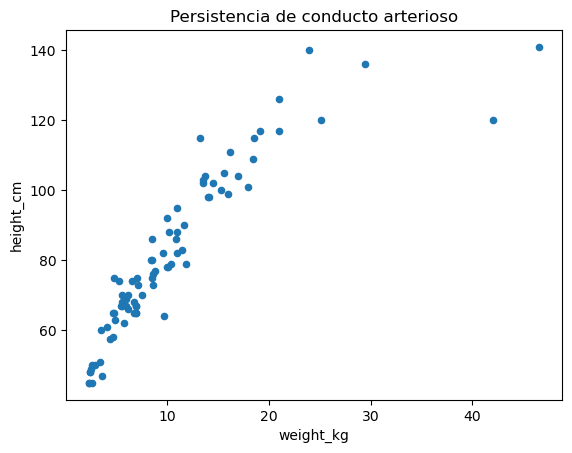

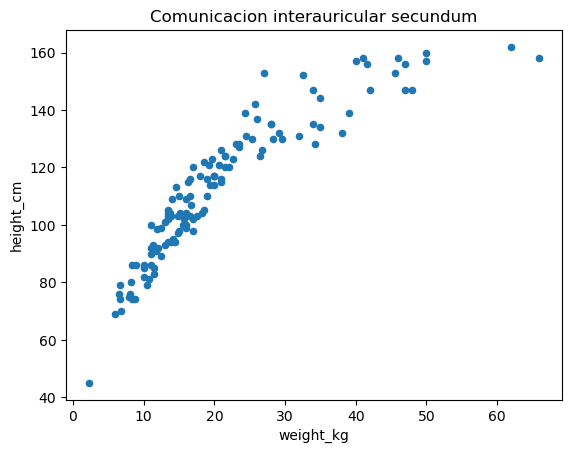

In [29]:
# Plot data
import matplotlib.pyplot as plt

df[df['diagnosis_main'] == 'Persistencia de conducto arterioso'].plot(kind='scatter', x='weight_kg', y='height_cm', title='Persistencia de conducto arterioso')
df[df['diagnosis_main'] == 'Comunicacion interauricular secundum'].plot(kind='scatter', x='weight_kg', y='height_cm', title= 'Comunicacion interauricular secundum')

## Part 2: ML Pre-Processing

1. Bin data by frequency.
2. Use only high frequency values.
3. Encode data and merge with original.

In [30]:
# Bin
bins = kardiasclean.perform_binning_scalar(df, 'diagnosis_main', value=2)
bins

Other                                       696
Comunicacion interauricular secundum        124
Comunicacion interventricular membranosa    115
Persistencia de conducto arterioso           82
PCA                                          76
                                           ... 
Estenosis supravalvular aortica               2
CIA amplia                                    2
Coartacion                                    2
Estenosis subvalvular pulmonar                2
Conducto arterioso permeable de 27 mm         2
Name: diagnosis_main, Length: 172, dtype: int64

In [31]:
low, high = kardiasclean.perform_frequency_split_quantile(df['diagnosis_main'], 0.95)
high

Comunicacion interauricular secundum                                          124
Comunicacion interventricular membranosa                                      115
Persistencia de conducto arterioso                                             82
PCA                                                                            76
Tetralogia de Fallot estenosis pulmonar                                        46
Tetralogia de Fallot                                                           39
Hipoplasia de arco aortico                                                     31
Estenosis aortica subvalvular                                                  30
Coartacion de aorta                                                            30
Comunicacion interauricular ostium secundum                                    28
Comunicacion interventricular perimembranosa                                   28
Persistencia de Conducto Arterioso                                             23
Comunicacion int

In [32]:
# Print eval
evaluation = kardiasclean.evaluate_distribution(high, low)
print(evaluation)

Number of high frequency data: 971
Number of low frequency data: 1028
--------------------
Total Number of data: 1999.
Percentage of high data: 48.57%
Percentage of low data: 51.43%
--------------------
Summary
--------------------
From 1999 data, 45 account for 48.57% of the total count.



In [35]:
# Get only high frequency values from original df
high_freq_df = df[df['diagnosis_main'].isin(high.index)]
# save to csv
#high_freq_df.to_csv("./resources/high_freq_test.csv")
high_freq_df.head()

,patient_id,diagnosis_main,gender,age,weight_kg,height_cm,stay_days
0,0,Comunicacion interauricular secundum,0,3942,35.0,134.0,2.0
1,1,Comunicacion interauricular secundum,1,3202,18.0,117.0,2.0
2,2,Comunicacion interauricular secundum,0,3147,22.0,120.0,2.0
3,3,Comunicacion interauricular secundum,0,4005,42.0,147.0,2.0
4,4,Comunicacion interauricular secundum,0,5289,40.0,157.0,3.0


In [36]:
# encode selected data
encoded_df = kardiasclean.perform_matrix_encoding(high_freq_df['diagnosis_main'], high_freq_df['patient_id'])
encoded_df.head()

,patient_id,diagnosis_main_Comunicacion interauricular secundum,diagnosis_main_Comunicacion interventricular Tipo 2 perimembranosa,diagnosis_main_Estenosis aortica subvalvular,diagnosis_main_Persistencia de conducto arterioso,diagnosis_main_Persistencia de Conducto Arterioso,diagnosis_main_Estenosis pulmonar valvular,diagnosis_main_Comunicacion interventricular membranosa,diagnosis_main_Comunicacion interventricular tipo 2 membranosa,diagnosis_main_Tetralogia de Fallot,...,diagnosis_main_Sindrome de corazon izquierdo hipoplasico,diagnosis_main_CIA,diagnosis_main_Estenosis subaortica,diagnosis_main_Formane oval permeable,diagnosis_main_Foramen bulboventricular no restrictivo,diagnosis_main_Comunicacion interventricular membranosa con extension a la via de entrada,diagnosis_main_Conducto arterioso persistente,diagnosis_main_Comunicacion interventricular,diagnosis_main_Conexion anomala parcial de venas pulmonares,diagnosis_main_Conducto arterioso permeable
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# merge encoded with original 
merged_df = pd.merge(high_freq_df, encoded_df)
merged_df = merged_df.drop("diagnosis_main", axis=1)
merged_df.head()

,patient_id,gender,age,weight_kg,height_cm,stay_days,diagnosis_main_Comunicacion interauricular secundum,diagnosis_main_Comunicacion interventricular Tipo 2 perimembranosa,diagnosis_main_Estenosis aortica subvalvular,diagnosis_main_Persistencia de conducto arterioso,...,diagnosis_main_Sindrome de corazon izquierdo hipoplasico,diagnosis_main_CIA,diagnosis_main_Estenosis subaortica,diagnosis_main_Formane oval permeable,diagnosis_main_Foramen bulboventricular no restrictivo,diagnosis_main_Comunicacion interventricular membranosa con extension a la via de entrada,diagnosis_main_Conducto arterioso persistente,diagnosis_main_Comunicacion interventricular,diagnosis_main_Conexion anomala parcial de venas pulmonares,diagnosis_main_Conducto arterioso permeable
0,0,0,3942,35.0,134.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,3202,18.0,117.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,3147,22.0,120.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,4005,42.0,147.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,5289,40.0,157.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# TODO: Scale Values (NEED TO COMPLETE DATA CLEANING FIRST!)
# import scikitlearn scaler, etc.

## Part 7: Machine Learning

In [11]:
# TODO: ML
# import keras, scikitlearn, etc.